<a href="https://colab.research.google.com/github/eyal-gi/Plant-disease-classifier/blob/main/EYAL_AgricultureTechProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import random

from tqdm import tqdm
tqdm.pandas()


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Set seed

In [ ]:
random.seed(10), np.random.seed(10), tf.random.set_seed(10)     # set seeds

(None, None, None)

# Upload dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/train.csv"
IMAGES_PATH = "/content/drive/MyDrive/Colab Notebooks/images"

data = pd.read_csv(DATA_PATH)

In [ ]:
data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
data.image_id = data.image_id.apply(lambda x: x+'.jpg')
print("Train Images:{}".format(data.image_id.shape))
data.head()

Train Images:(1821,)


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0.jpg,0,0,0,1
1,Train_1.jpg,0,1,0,0
2,Train_2.jpg,1,0,0,0
3,Train_3.jpg,0,0,1,0
4,Train_4.jpg,1,0,0,0


# Split data
Split the data to train, validation and test

In [ ]:
data['image_id']

0          Train_0.jpg
1          Train_1.jpg
2          Train_2.jpg
3          Train_3.jpg
4          Train_4.jpg
             ...      
1816    Train_1816.jpg
1817    Train_1817.jpg
1818    Train_1818.jpg
1819    Train_1819.jpg
1820    Train_1820.jpg
Name: image_id, Length: 1821, dtype: object

In [ ]:
data[['healthy', 'multiple_diseases', 'rust', 'scab']]

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1816,0,0,0,1
1817,1,0,0,0
1818,1,0,0,0
1819,0,0,1,0


In [ ]:
train, test_df = train_test_split(data, random_state=42, train_size = 0.8, stratify=data[['healthy', 'multiple_diseases', 'rust', 'scab']])
train_df, val_df = train_test_split(train, random_state=42, train_size = 0.8, stratify=train[['healthy', 'multiple_diseases', 'rust', 'scab']])


In [ ]:
train_df

,image_id,healthy,multiple_diseases,rust,scab
1166,Train_1166.jpg,0,0,0,1
1814,Train_1814.jpg,1,0,0,0
985,Train_985.jpg,0,0,1,0
1163,Train_1163.jpg,0,0,1,0
1125,Train_1125.jpg,0,0,1,0
...,...,...,...,...,...
1467,Train_1467.jpg,0,0,0,1
558,Train_558.jpg,1,0,0,0
1716,Train_1716.jpg,0,0,0,1
274,Train_274.jpg,0,0,1,0


In [ ]:
val_df

,image_id,healthy,multiple_diseases,rust,scab
1090,Train_1090.jpg,0,0,0,1
239,Train_239.jpg,0,0,0,1
259,Train_259.jpg,0,0,1,0
459,Train_459.jpg,0,0,0,1
1369,Train_1369.jpg,0,1,0,0
...,...,...,...,...,...
879,Train_879.jpg,0,0,0,1
272,Train_272.jpg,0,0,0,1
1367,Train_1367.jpg,0,0,0,1
901,Train_901.jpg,1,0,0,0


In [ ]:
test_df

,image_id,healthy,multiple_diseases,rust,scab
551,Train_551.jpg,1,0,0,0
1537,Train_1537.jpg,0,0,0,1
1648,Train_1648.jpg,0,1,0,0
878,Train_878.jpg,0,0,0,1
821,Train_821.jpg,0,0,1,0
...,...,...,...,...,...
1641,Train_1641.jpg,0,1,0,0
1759,Train_1759.jpg,0,0,0,1
516,Train_516.jpg,0,0,1,0
1422,Train_1422.jpg,0,0,1,0


# Data preprocess

In [ ]:
train_datagen=ImageDataGenerator( horizontal_flip=True,
                            vertical_flip=True,
                            rotation_range=90,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            fill_mode='nearest',
                            shear_range=0.1,
                            rescale=1./255,
                            brightness_range=[0.5, 1.5]
                          )

# train
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=IMAGES_PATH,
x_col="image_id",
y_col= ['healthy', 'multiple_diseases', 'rust', 'scab'],
batch_size=16,
seed=42,
shuffle=True,
class_mode="other",
target_size=(224, 224))



--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 1164 validated image filenames.


In [ ]:
test_datagen=ImageDataGenerator( rescale=1./255 )

# validation
val_generator=test_datagen.flow_from_dataframe(
dataframe=val_df,
directory=IMAGES_PATH,
x_col="image_id",
y_col= ['healthy', 'multiple_diseases', 'rust', 'scab'],
batch_size=16,
seed=42,
shuffle=True,
class_mode="other",
target_size=(224, 224))

# test
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory=IMAGES_PATH,
x_col="image_id",
y_col= ['healthy', 'multiple_diseases', 'rust', 'scab'],
batch_size=16,
seed=42,
shuffle=False,
class_mode="other",
target_size=(224, 224))

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 292 validated image filenames.
Found 365 validated image filenames.


In [ ]:
train_img, train_lab = next(train_generator)
train_img.shape

(16, 224, 224, 3)

In [ ]:
val_img, val_lab = next(val_generator)
val_img.shape

(16, 224, 224, 3)

In [ ]:
test_img, test_lab = next(test_generator)
test_img.shape

(16, 224, 224, 3)

# Model

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras
# parameters from Too et. al (2019)
train_params = {
    'shape': (224, 224, 3),
    'train_layers': 400,
    'epochs': 10,
    'lr': 0.001,
    'decay': 0.00247875217,
    'activation': 'relu',
    'batch_size': 16
}

# model parameters
img_shape = train_params['shape']
train_layers_num = train_params['train_layers']
base_learning_rate = train_params['lr']
dcy = train_params['decay']
activation = train_params['activation']
n_epochs = train_params['epochs']
batch = train_params['batch_size']

inputs = Input(shape=train_params['shape'])  # model inputs size
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape ,pooling='avg')  # extract the DenseNet network

#print(len(densenet.layers))

# Loop over trainable layers
# for layer in densenet.layers[:-train_layers_num]:
#   layer.trainable = False

x = densenet.output
prediction_layer = Dense(4, activation=activation)(x)
# join layer
model = Model(inputs = densenet.input, outputs = prediction_layer)


29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# compile the model
sgd=keras.optimizers.SGD(learning_rate=base_learning_rate, decay=dcy)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
history =  model.fit(train_generator,  epochs = n_epochs, verbose = 1, validation_data=val_generator)

Epoch 1/10


KeyboardInterrupt: ignored

# Fine-Tuning the model

In [ ]:
def create_plot(x, y, x_name):
    # create tunning plots
    plt.plot(x,y)
    plt.ylabel('Accuracy')
    plt.xlabel(x_name)
    plt.title(f'Accuracy vs. {x_name}')
    plt.ylim(0, 1)
    plt.show()

## Activation Function

In [ ]:
acc = []
activations = ['sigmoid', 'relu', 'softmax', 'elu']

for activation in activations:
    print(f'activation = {activation}')
    densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape ,pooling='avg')  # extract the DenseNet network
    x = densenet.output
    prediction_layer = Dense(4, activation=activation)(x)
    t_model = Model(inputs = densenet.input, outputs = prediction_layer)
    sgd=keras.optimizers.SGD(learning_rate=base_learning_rate, decay=dcy)
    t_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    hist = t_model.fit(train_generator,  epochs = n_epochs, verbose = 1, validation_data=val_generator)
    acc.append(hist.history['val_categorical_accuracy'][-1]) # take the validation accuracy
create_plot(activations, acc, 'Activation')
print(f' Tuning activation acc = {acc}')
chosen_activation = activations[acc.index(max(acc))]
print(f'The chosen activation is {chosen_activation}')

## Number of epochs

In [ ]:
acc = []
epochs_num = [10, 30]

for en in epochs_num:
    print(f'Number of epochs = {en}')
    densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape ,pooling='avg')  # extract the DenseNet network
    x = densenet.output
    prediction_layer = Dense(4, activation='softmax')(x)
    t_model = Model(inputs = densenet.input, outputs = prediction_layer)
    sgd=keras.optimizers.SGD(learning_rate=base_learning_rate, decay=dcy)
    t_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    hist = t_model.fit(train_generator,  epochs = en, verbose = 1, validation_data=val_generator)
    acc.append(hist.history['val_categorical_accuracy'][-1]) # take the validation accuracy
create_plot(epochs_num, acc, 'Number of epochs')
print(f' Tuning number of epochs acc = {acc}')
chosen_epochs = epochs_num[acc.index(max(acc))]
print(f'The chosen number of epochs is {chosen_epochs}')

## Number of trained layers

In [ ]:
acc = []
train_layers_num = [1, 10, 50, 100, 200, 429]

for n_layers in train_layers_num:
    print(f'Number of trained layers = {n_layers}')
    densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape ,pooling='avg')  # extract the DenseNet network

    x = densenet.output
    prediction_layer = Dense(4, activation='softmax')(x)
    t_model = Model(inputs = densenet.input, outputs = prediction_layer)

    # Loop over trainable layers
    for layer in t_model.layers[:-n_layers]:
      layer.trainable = False

    sgd=keras.optimizers.SGD(learning_rate=base_learning_rate, decay=dcy)
    t_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    hist = t_model.fit(train_generator,  epochs = 10, verbose = 1, validation_data=val_generator)
    acc.append(hist.history['val_categorical_accuracy'][-1]) # take the validation accuracy
create_plot(train_layers_num, acc, 'Number of trained layers')
print(f' Tuning number of trained layers acc = {acc}')
chosen_layers = train_layers_num[acc.index(max(acc))]
print(f'The chosen number of train layers is {chosen_layers}')

# Training and Eval

In [ ]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape ,pooling='avg')  # extract the DenseNet network
x = densenet.output
prediction_layer = Dense(4, activation='softmax')(x)
# join layer
model = Model(inputs = densenet.input, outputs = prediction_layer)
# compile the model
sgd=keras.optimizers.SGD(learning_rate=base_learning_rate, decay=dcy)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history =  model.fit(train_generator,  epochs = 30, verbose = 1, validation_data=val_generator)

Epoch 1/30
73/73 [==============================] - 254s 3s/step - loss: 1.2090 - categorical_accuracy: 0.4596 - val_loss: 1.1809 - val_categorical_accuracy: 0.4658
Epoch 2/30
73/73 [==============================] - 82s 1s/step - loss: 0.8852 - categorical_accuracy: 0.6667 - val_loss: 0.8371 - val_categorical_accuracy: 0.6370
Epoch 3/30
73/73 [==============================] - 91s 1s/step - loss: 0.7087 - categorical_accuracy: 0.7826 - val_loss: 0.6270 - val_categorical_accuracy: 0.7945
Epoch 4/30
73/73 [==============================] - 82s 1s/step - loss: 0.6009 - categorical_accuracy: 0.8204 - val_loss: 0.5064 - val_categorical_accuracy: 0.8459
Epoch 5/30
73/73 [==============================] - 82s 1s/step - loss: 0.5534 - categorical_accuracy: 0.8316 - val_loss: 0.4207 - val_categorical_accuracy: 0.8938
Epoch 6/30
73/73 [==============================] - 82s 1s/step - loss: 0.4966 - categorical_accuracy: 0.8505 - val_loss: 0.3893 - val_categorical_accuracy: 0.8938
Epoch 7/30
73/7

In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
model = load_model('model.h5')

In [ ]:
hist_df = pd.DataFrame(data = history.history)
hist_df.head()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,1.208986,0.459622,1.180910,0.465753
1,0.885234,0.666667,0.837135,0.636986
2,0.708665,0.782646,0.627012,0.794521
3,0.600897,0.820447,0.506351,0.845890
4,0.553394,0.831615,0.420701,0.893836


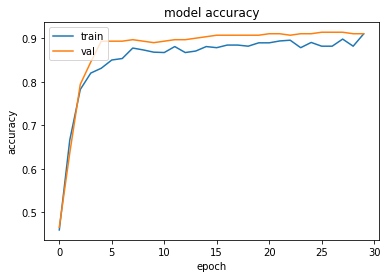

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

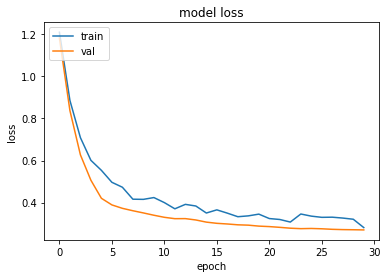

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# val_acc_score 
np.amax(history.history['val_categorical_accuracy'])  # model max accuracy

0.914383590221405

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)


Evaluate on test data
23/23 [==============================] - 15s 640ms/step - loss: 0.2310 - categorical_accuracy: 0.9260
test loss, test acc: [0.23098374903202057, 0.9260274171829224]


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator)     # model predictions scores


In [ ]:
predictions

array([[4.36427563e-01, 7.45886117e-02, 1.49186905e-02, 4.74065065e-01],
       [2.33806849e-01, 9.93054807e-02, 1.10734012e-02, 6.55814230e-01],
       [8.39880295e-03, 2.41736323e-01, 5.24804890e-01, 2.25059971e-01],
       ...,
       [2.25146723e-04, 6.65206974e-03, 9.92709756e-01, 4.12969996e-04],
       [3.62838362e-03, 4.76685800e-02, 9.46169913e-01, 2.53312383e-03],
       [9.99406695e-01, 1.21166006e-04, 1.77159265e-04, 2.95022677e-04]],
      dtype=float32)

In [ ]:
y_pred = predictions.round().astype(int)

In [ ]:
y_pred

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [ ]:
true_ground = test_df[['healthy', 'multiple_diseases', 'rust', 'scab']]
true_ground=pd.DataFrame(true_ground)
y_test = np.empty(len(true_ground))

for i in range(len(true_ground)):
  var=pd.array(true_ground.iloc[i])
  if np.array_equal(var, [0,1,0,0]):
    y_test[i]= int(1)
  elif np.array_equal(var, [0,0,1,0]):
    y_test[i]=int(2)
  elif np.array_equal(var, [0,0,0,1]):
    y_test[i]=int(3)
  else:
    y_test[i]=int(0)

In [ ]:
Y_pred = np.empty(len(y_pred))


for i in range(len(y_pred)):
  var=y_pred[i]
  if np.array_equal(var, [0,1,0,0]):
    Y_pred[i]= int(1)
  elif np.array_equal(var, [0,0,1,0]):
    Y_pred[i]=int(2)
  elif np.array_equal(var, [0,0,0,1]):
    Y_pred[i]=int(3)
  else:
    Y_pred[i]=int(0)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
cm=confusion_matrix(y_test, Y_pred)
print(cm)
print('Classification Report')
target_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
print(classification_report(y_test, Y_pred, target_names=target_names))



Confusion Matrix
[[102   0   0   1]
 [  7   1   6   4]
 [  0   0 125   0]
 [ 12   0   0 107]]
Classification Report
                   precision    recall  f1-score   support

          healthy       0.84      0.99      0.91       103
multiple_diseases       1.00      0.06      0.11        18
             rust       0.95      1.00      0.98       125
             scab       0.96      0.90      0.93       119

         accuracy                           0.92       365
        macro avg       0.94      0.74      0.73       365
     weighted avg       0.93      0.92      0.90       365



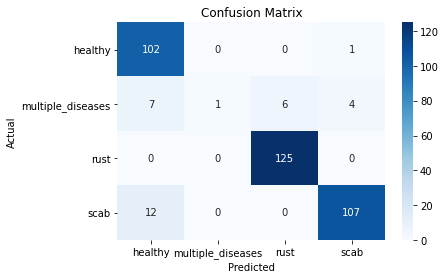

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=target_names, yticklabels=target_names, fmt = ".0f")
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()